In [1]:
import numpy as np

from processing import convert_to_event_structure
from read_and_write import read_data, write_events_to_csv

In [25]:
output_directory = "data/optics_run8"

scint_data, optical_data, germanium_data, tracks_data = read_data(output_directory, file_extension="hdf5")

run8 = convert_to_event_structure(scint_data, optical_data, germanium_data, tracks_data)

write_events_to_csv(run8, "results_run8.csv") 


Warning. No data found at table path stp/scintillator in file data/optics_run8/out_t0.hdf5.
No scintillator data found in file data/optics_run8/out_t0.hdf5.
Warning. No data found at table path stp/scintillator in file data/optics_run8/out_t7.hdf5.
No scintillator data found in file data/optics_run8/out_t7.hdf5.
Warning. No data found at table path stp/scintillator in file data/optics_run8/out_t8.hdf5.
No scintillator data found in file data/optics_run8/out_t8.hdf5.
Warning. No data found at table path stp/scintillator in file data/optics_run8/out_t10.hdf5.
No scintillator data found in file data/optics_run8/out_t10.hdf5.
Warning. No data found at table path stp/optical in file data/optics_run8/out_t0.hdf5.
No optical data found in file data/optics_run8/out_t0.hdf5.
Warning. No data found at table path stp/optical in file data/optics_run8/out_t7.hdf5.
No optical data found in file data/optics_run8/out_t7.hdf5.
Warning. No data found at table path stp/optical in file data/optics_run8/ou

In [6]:
output_directory = "data/optics_run7"

scint_data, optical_data, germanium_data, tracks_data = read_data(output_directory, file_extension="hdf5")
run7 = convert_to_event_structure(scint_data, optical_data, germanium_data, tracks_data)

In [7]:
combined_runs = run8 + run7
write_events_to_csv(combined_runs, "results_run8_run7.csv")

25 events with Ge-77 count > 0


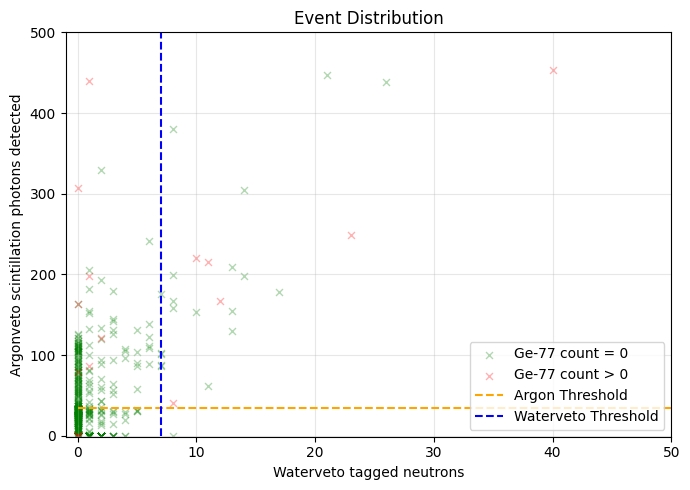

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Assume combined_runs is a list[Event]

# Extract arrays with NaN handling
x = np.array([
    0 if (e.n_200ns_intervals_10_200_us is None or np.isnan(e.n_200ns_intervals_10_200_us))
    else e.n_200ns_intervals_10_200_us
    for e in combined_runs
])

y = np.array([
    0 if (e.max_10us_n_photons is None or np.isnan(e.max_10us_n_photons))
    else e.max_10us_n_photons
    for e in combined_runs
])

ge77 = np.array([e.ge77_count for e in combined_runs])

# Masks
mask_no_ge77 = ge77 == 0
mask_ge77 = ge77 > 0

print(np.sum(mask_ge77), "events with Ge-77 count > 0")

# Plot
plt.figure(figsize=(7, 5))

plt.scatter(
    x[mask_no_ge77],
    y[mask_no_ge77],
    marker='x',
    s=25,
    linewidths=1,
    color='green',
    label='Ge-77 count = 0',
    alpha = 0.3
)

plt.scatter(
    x[mask_ge77],
    y[mask_ge77],
    marker='x',
    s=25,
    linewidths=1,
    color='red',
    label='Ge-77 count > 0',
    alpha = 0.3
)


plt.xlabel("Waterveto tagged neutrons")
plt.ylabel("Argonveto scintillation photons detected")
plt.title("Event Distribution")
plt.hlines(y=35, xmin=0, xmax=max(x), color='orange', linestyle='--', label='Argon Threshold')
plt.vlines(x=7, ymin=0, ymax=max(y), color='blue', linestyle='--', label='Waterveto Threshold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

plt.xlim(-1, 50)
plt.ylim(-1, 500)

plt.show()


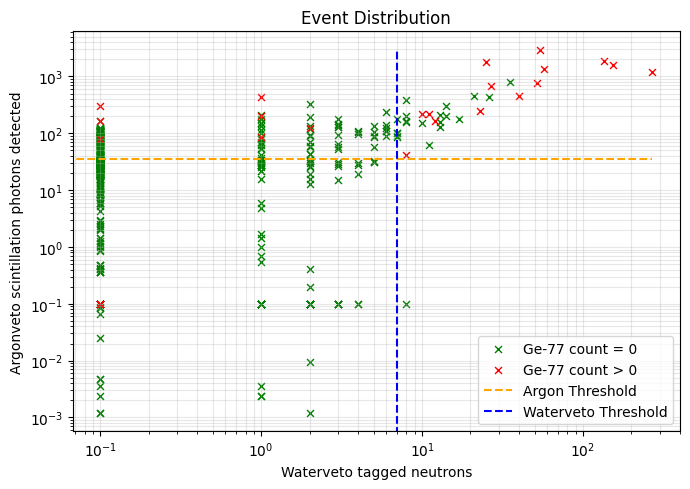

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Small positive value to place zeros on log scale
EPS = 1e-1

# Extract arrays with NaN/zero handling
x = np.array([
    e.n_200ns_intervals_10_200_us
    if e.n_200ns_intervals_10_200_us not in (None, 0) and not np.isnan(e.n_200ns_intervals_10_200_us)
    else EPS
    for e in combined_runs
])

y = np.array([
    e.max_10us_n_photons
    if e.max_10us_n_photons not in (None, 0) and not np.isnan(e.max_10us_n_photons)
    else EPS
    for e in combined_runs
])

ge77 = np.array([e.ge77_count for e in combined_runs])

# Masks
mask_no_ge77 = ge77 == 0
mask_ge77 = ge77 > 0

# Plot
plt.figure(figsize=(7, 5))

plt.scatter(
    x[mask_no_ge77],
    y[mask_no_ge77],
    marker='x',
    s=25,
    linewidths=1,
    color='green',
    label='Ge-77 count = 0'
)

plt.scatter(
    x[mask_ge77],
    y[mask_ge77],
    marker='x',
    s=25,
    linewidths=1,
    color='red',
    label='Ge-77 count > 0'
)

plt.xscale('log')
plt.yscale('log')

plt.xlabel("Waterveto tagged neutrons")
plt.ylabel("Argonveto scintillation photons detected")
plt.title("Event Distribution")
plt.hlines(y=35, xmin=0, xmax=max(x), color='orange', linestyle='--', label='Argon Threshold')
plt.vlines(x=7, ymin=0, ymax=max(y), color='blue', linestyle='--', label='Waterveto Threshold')

plt.legend()
plt.grid(True, which="both", alpha=0.3)
plt.tight_layout()
plt.savefig("plots/event_distribution_loglog.png")
plt.show()


# Things to improve this plot:

Add a cumulative of the red Ge-77 hits below the axes. 